In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## read flyai data for vision task

In [3]:
path_root = Path('../vision/HandDetectionFlyAI_FlyAI/')
path_train = path_root/'data/local/train'
path_test = path_root/'data/local/test'
path_train.ls(),path_test.ls()

([PosixPath('../vision/HandDetectionFlyAI_FlyAI/data/local/train/hand'),
  PosixPath('../vision/HandDetectionFlyAI_FlyAI/data/local/train/train.csv')],
 [PosixPath('../vision/HandDetectionFlyAI_FlyAI/data/local/test/hand'),
  PosixPath('../vision/HandDetectionFlyAI_FlyAI/data/local/test/test.csv')])

In [43]:
trn_csv = pd.read_csv(path_train/'train.csv')
val_csv = pd.read_csv(path_test/'test.csv')
trn_csv.head(),val_csv.head()

(        image_path   p1   p2   p3   p4   p5   p6   p7   p8   p9 ...   p17  \
 0  hand/000001.jpg  533  400  130  112  507  368  294  124  506 ...   185   
 1  hand/000002.jpg  533  400  212   91  513  324  317   96  512 ...   263   
 2  hand/000003.jpg  533  400  214  103  532  358  327  112  532 ...   262   
 3  hand/000006.jpg  533  400  214  103  532  356  332  111  532 ...   262   
 4  hand/000007.jpg  533  400   87  104  472  388  259  117  472 ...   148   
 
    p18  p19  p20  p21  p22  p23  p24  p25  p26  
 0  235  165  151  214  184  225  112  270  144  
 1  198  230  127  269  155  267   91  315  116  
 2  252  234  176  273  209  271  103  310  132  
 3  252  234  176  273  209  271  103  310  132  
 4  241  111  155  172  195  177  104  236  142  
 
 [5 rows x 27 columns],
         image_path   p1   p2  p3  p4   p5   p6   p7  p8   p9 ...   p17  p18  \
 0  hand/000004.jpg  533  400  79  46  478  350  223  63  478 ...   128  216   
 1  hand/000005.jpg  533  400  46  51  449  

In [5]:
x=trn_csv.iloc[:,list(range(4,27,2))]

In [6]:
x=x.div(trn_csv.iloc[:,2],axis="rows")

In [7]:
x.head()

,p4,p6,p8,p10,p12,p14,p16,p18,p20,p22,p24,p26
0,0.2800,0.920,0.3100,0.7350,0.6350,0.7200,0.5000,0.5875,0.3775,0.4600,0.2800,0.360
1,0.2275,0.810,0.2400,0.6275,0.5600,0.6425,0.4250,0.4950,0.3175,0.3875,0.2275,0.290
2,0.2575,0.895,0.2800,0.7025,0.6250,0.7125,0.5475,0.6300,0.4400,0.5225,0.2575,0.330
3,0.2575,0.890,0.2775,0.7000,0.6225,0.7075,0.5475,0.6300,0.4400,0.5225,0.2575,0.330
4,0.2600,0.970,0.2925,0.7475,0.6325,0.7200,0.5075,0.6025,0.3875,0.4875,0.2600,0.355


In [8]:
y=trn_csv.iloc[:,list(range(3,27,2))]

In [9]:
y=y.div(trn_csv.iloc[:,1],axis="rows")

In [10]:
y.head()

,p3,p5,p7,p9,p11,p13,p15,p17,p19,p21,p23,p25
0,0.243902,0.951220,0.551595,0.949343,0.305816,0.392120,0.255159,0.347092,0.309568,0.401501,0.422139,0.506567
1,0.397749,0.962477,0.594747,0.960600,0.469043,0.534709,0.418386,0.493433,0.431520,0.504690,0.500938,0.590994
2,0.401501,0.998124,0.613508,0.998124,0.476548,0.549719,0.422139,0.491557,0.439024,0.512195,0.508443,0.581614
3,0.401501,0.998124,0.622889,0.998124,0.478424,0.553471,0.422139,0.491557,0.439024,0.512195,0.508443,0.581614
4,0.163227,0.885553,0.485929,0.885553,0.234522,0.332083,0.170732,0.277674,0.208255,0.322702,0.332083,0.442777


In [51]:
trn_csv= pd.concat([trn_csv.iloc[:,0],x,y],axis=1)

In [52]:
trn_csv.head()

,image_path,p4,p6,p8,p10,p12,p14,p16,p18,p20,...,p7,p9,p11,p13,p15,p17,p19,p21,p23,p25
0,hand/000001.jpg,0.2800,0.920,0.3100,0.7350,0.6350,0.7200,0.5000,0.5875,0.3775,...,0.551595,0.949343,0.305816,0.392120,0.255159,0.347092,0.309568,0.401501,0.422139,0.506567
1,hand/000002.jpg,0.2275,0.810,0.2400,0.6275,0.5600,0.6425,0.4250,0.4950,0.3175,...,0.594747,0.960600,0.469043,0.534709,0.418386,0.493433,0.431520,0.504690,0.500938,0.590994
2,hand/000003.jpg,0.2575,0.895,0.2800,0.7025,0.6250,0.7125,0.5475,0.6300,0.4400,...,0.613508,0.998124,0.476548,0.549719,0.422139,0.491557,0.439024,0.512195,0.508443,0.581614
3,hand/000006.jpg,0.2575,0.890,0.2775,0.7000,0.6225,0.7075,0.5475,0.6300,0.4400,...,0.622889,0.998124,0.478424,0.553471,0.422139,0.491557,0.439024,0.512195,0.508443,0.581614
4,hand/000007.jpg,0.2600,0.970,0.2925,0.7475,0.6325,0.7200,0.5075,0.6025,0.3875,...,0.485929,0.885553,0.234522,0.332083,0.170732,0.277674,0.208255,0.322702,0.332083,0.442777


In [74]:
a = dict(one_hot=True,classes=list(range(1,25)))

In [ ]:
data1 = ImageIte

In [72]:
data = (PointsItemList
        .from_df(path=path_train,df=trn_csv)
        .split_by_rand_pct(seed=42)
        .label_from_df(cols= list(range(1,25)),label_cls=FloatList)

        .transform(get_transforms(), size=(224,224))
        .databunch()
        .normalize(imagenet_stats))

In [73]:
data

ImageDataBunch;

Train: LabelList (1265 items)
x: PointsItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
[0.28     0.92     0.31     0.735    0.635    0.72     0.5      0.5875   0.3775   0.46     0.28     0.36     0.243902
 0.951219 0.551595 0.949343 0.305816 0.39212  0.255159 0.347092 0.309568 0.401501 0.422139 0.506567],[0.2275   0.81     0.24     0.6275   0.56     0.6425   0.425    0.495    0.3175   0.3875   0.2275   0.29     0.397749
 0.962477 0.594747 0.9606   0.469043 0.534709 0.418386 0.493433 0.43152  0.50469  0.500938 0.590994],[0.2575   0.895    0.28     0.7025   0.625    0.7125   0.5475   0.63     0.44     0.5225   0.2575   0.33     0.401501
 0.998124 0.613508 0.998124 0.476548 0.549719 0.422139 0.491557 0.439024 0.512195 0.508443 0.581613],[0.2575   0.89     0.2775   0.7      0.6225   0.7075   0.5475   0.63     0.44     0.5225   0.2575   0.33     0.401501
 0.998124 0.622889 0.998124 0.478424 0.553471 0

In [45]:
data=ImageDataBunch.from_df(path=path_train,df=trn_csv,label_col=list(range(1,25)),ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0).normalize(imagenet_stats)

In [35]:
data_val=ImageDataBunch.from_df(path=path_test,df=val_csv,ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0,continuous=True).normalize(imagenet_stats)
data.valid_dl= data_val.train_dl
data

You can deactivate this warning by passing `no_check=True`.
You can deactivate this warning by passing `no_check=True`.


/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [785, 478, 1483, 421, 465, 776, 1359, 300, 261, 526, 330, 581, 1228, 727, 382, 616, 192, 1059, 1050, 278, 1511, 1372, 949, 342, 212, 904, 728, 1446, 445, 1308, 276, 1198, 211, 844, 917, 304, 922, 932, 701, 1142, 154, 113, 807, 344, 1294, 1224, 842, 1438, 856, 79, 578, 1321, 220, 251, 886, 769, 218, 1480, 745, 258, 846, 484, 1509, 1371]
  warn(f"There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in {idx}")
/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [251, 86, 467, 6, 370, 421, 511, 465, 432, 457, 49, 387, 250, 345, 30, 303, 292, 123, 83, 521, 15, 305, 437, 379, 12, 291, 74, 461, 210, 339, 195, 

ImageDataBunch;

Train: LabelList
y: CategoryList (1581 items)
[Category 533, Category 533, Category 533, Category 533, Category 533]...
Path: ../vision/HandDetectionFlyAI_FlyAI/data/local/train
x: ImageItemList (1581 items)
[Image (3, 533, 400), Image (3, 533, 400), Image (3, 533, 400), Image (3, 533, 400), Image (3, 533, 400)]...
Path: ../vision/HandDetectionFlyAI_FlyAI/data/local/train;

Valid: LabelList
y: CategoryList (527 items)
[Category 533, Category 533, Category 512, Category 512, Category 706]...
Path: ../vision/HandDetectionFlyAI_FlyAI/data/local/test
x: ImageItemList (527 items)
[Image (3, 533, 400), Image (3, 533, 400), Image (3, 512, 400), Image (3, 512, 400), Image (3, 706, 400)]...
Path: ../vision/HandDetectionFlyAI_FlyAI/data/local/test;

Test: None

/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


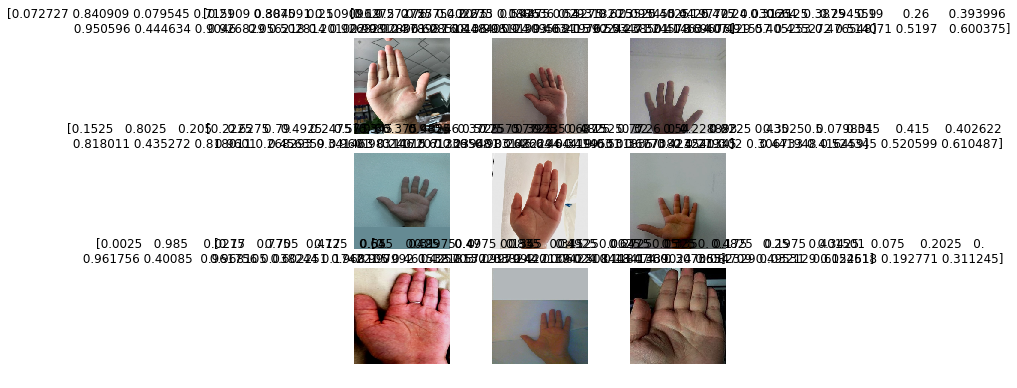

In [74]:
data.show_batch(rows=3,figsize=(7,6))

In [7]:
@dataclass
class Fbeta_binary(Callback):
    "Computes the fbeta between preds and targets for single-label classification"
    beta2: int = 2
    eps: float = 1e-9
    clas:int=1
    
    def on_epoch_begin(self, **kwargs):
        self.TP = 0
        self.total_y_pred = 0   
        self.total_y_true = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        y_pred = last_output.argmax(dim=1)
        y_true = last_target.float()
        
        self.TP += ((y_pred==self.clas) * (y_true==self.clas)).float().sum()
        self.total_y_pred += (y_pred==self.clas).float().sum()
        self.total_y_true += (y_true==self.clas).float().sum()
    
    def on_epoch_end(self, **kwargs):
        beta2=self.beta2**2
        prec = self.TP/(self.total_y_pred+self.eps)
        rec = self.TP/(self.total_y_true+self.eps)       
        res = (prec*rec)/(prec*beta2+rec+self.eps)*(1+beta2)
        self.metric = res

In [76]:
from learner import model_meta

In [77]:
model_meta

{<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet34(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet50(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet101(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet152(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.squeezenet.squeezenet1_0(pretrained=False, **kwargs)>: {'cut': -1,
  'split': <function learner._squeezenet_split(m:torch.nn.mod

In [79]:
for m in list(model_meta.keys()):
    print(m)#learn = None
    try:
        gc.collect()
        torch.cuda.empty_cache()
        learn = create_cnn(data,m)
        learn.fit_one_cycle(4)
    except:
        print('too many parameters')

<function resnet18 at 0x7fa399fc58c8>


epoch,train_loss,valid_loss,time
0,1.316072,0.304087,00:05
1,0.916911,0.105405,00:04
2,0.643134,0.055692,00:04
3,0.488946,0.049559,00:04


<function resnet34 at 0x7fa399fc5d08>


epoch,train_loss,valid_loss,time
0,1.256106,0.302600,00:05
1,0.868108,0.100930,00:05
2,0.611528,0.055785,00:05
3,0.464255,0.047094,00:05


<function resnet50 at 0x7fa399fc5d90>


epoch,train_loss,valid_loss,time
0,1.329363,0.392001,00:08
1,0.903980,0.112106,00:08
2,0.634964,0.049829,00:08
3,0.481319,0.039258,00:08


<function resnet101 at 0x7fa399fc5e18>


epoch,train_loss,valid_loss,time
0,1.260080,0.363925,00:11
1,0.862792,0.098082,00:11
2,0.602750,0.044368,00:11
3,0.458064,0.033781,00:11


<function resnet152 at 0x7fa399fc5ea0>


epoch,train_loss,valid_loss,time


too many parameters
<function squeezenet1_0 at 0x7fa399f53620>


epoch,train_loss,valid_loss,time
0,1.368210,0.361609,00:04
1,0.959146,0.104953,00:04
2,0.687440,0.055195,00:04
3,0.533132,0.045033,00:04


<function squeezenet1_1 at 0x7fa399f538c8>


epoch,train_loss,valid_loss,time
0,1.308287,0.324112,00:04
1,0.909945,0.102837,00:04
2,0.650758,0.053081,00:04
3,0.500235,0.041028,00:04


<function densenet121 at 0x7fa399f5d730>


epoch,train_loss,valid_loss,time
0,1.315191,0.292510,00:09
1,0.906118,0.075796,00:08
2,0.632416,0.041346,00:08
3,0.477753,0.032938,00:08


<function densenet169 at 0x7fa399f5d7b8>


epoch,train_loss,valid_loss,time


too many parameters
<function densenet201 at 0x7fa399f5d840>


epoch,train_loss,valid_loss,time


too many parameters
<function densenet161 at 0x7fa399f5d8c8>


epoch,train_loss,valid_loss,time


too many parameters
<function vgg16_bn at 0x7fa399f53488>


epoch,train_loss,valid_loss,time
0,1.282579,0.241558,00:13
1,0.885781,0.071754,00:11
2,0.627402,0.047143,00:11
3,0.477732,0.039219,00:11


<function vgg19_bn at 0x7fa399f53598>


epoch,train_loss,valid_loss,time
0,1.296924,0.265587,00:13
1,0.898576,0.076849,00:13
2,0.637258,0.047102,00:13
3,0.486200,0.039185,00:13


<function alexnet at 0x7fa399fc5620>


epoch,train_loss,valid_loss,time
0,1.291972,0.279550,00:04
1,0.903190,0.087848,00:04
2,0.649278,0.049510,00:04
3,0.507739,0.042341,00:04


In [17]:
from scipy.io import wavfile

In [18]:
sr,y = wavfile.read("../speech/UrbanSoundClassification_FlyAI/data/input/wav/104.wav",)

In [22]:
?wavfile.read

In [23]:
for m in list(model_meta.keys())[5:]:
    #learn = None
    torch.cuda.empty_cache()
    learn = create_cnn(data,m,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])
    res=learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.226623,0.187498,0.067769,0.932231,0.929715
2,0.215413,0.167546,0.060683,0.939317,0.938399
3,0.174425,0.161622,0.060138,0.939862,0.938373
4,0.181529,0.159999,0.055778,0.944222,0.942905


Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/changebio/.torch/models/squeezenet1_1-f364aa15.pth
100%|██████████| 4966400/4966400 [00:03<00:00, 1387441.76it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.235650,0.192989,0.065225,0.934775,0.932251
2,0.181064,0.162079,0.058866,0.941134,0.939303
3,0.182070,0.155746,0.055959,0.944041,0.942857
4,0.176380,0.159411,0.058321,0.941679,0.939008


/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.202340,0.157076,0.051054,0.948946,0.947799
2,0.156629,0.136281,0.048874,0.951126,0.950065
3,0.134919,0.122245,0.045422,0.954578,0.953306
4,0.117643,0.115205,0.042696,0.957304,0.956376


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


RuntimeError: CUDA out of memory. Tried to allocate 117.50 MiB (GPU 0; 10.91 GiB total capacity; 9.21 GiB already allocated; 142.06 MiB free; 29.96 MiB cached)

In [13]:
list(model_meta.keys())

[<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet34(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet50(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet101(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet152(pretrained=False, **kwargs)>,
 <function torchvision.models.squeezenet.squeezenet1_0(pretrained=False, **kwargs)>,
 <function torchvision.models.squeezenet.squeezenet1_1(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet121(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet169(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet201(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet161(pretrained=False, **kwargs)>,
 <function torchvision.models.vgg.vgg16_bn(pretrained=False, **kwargs)>,
 <function torchvision.models.vgg.vgg19_bn(pretrain

In [17]:
for m in model_meta.keys():
    learn = create_cnn(data,m,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])
    res=learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.259443,0.206021,0.074491,0.925509,0.924214
2,0.187036,0.163220,0.058866,0.941134,0.939866
3,0.176926,0.143175,0.051054,0.948946,0.948126
4,0.133450,0.135708,0.049237,0.950763,0.949355


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.246255,0.188738,0.069404,0.930596,0.929364
2,0.172432,0.143756,0.050690,0.949310,0.948074
3,0.153237,0.136594,0.050690,0.949310,0.948016
4,0.141645,0.138862,0.051235,0.948765,0.946893


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.214714,0.164862,0.058140,0.941860,0.940454
2,0.165523,0.138334,0.050327,0.949673,0.948484
3,0.135429,0.127762,0.045422,0.954578,0.953428
4,0.129969,0.124768,0.046693,0.953307,0.951864


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/changebio/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [02:39<00:00, 1123626.88it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


RuntimeError: CUDA out of memory. Tried to allocate 49.00 MiB (GPU 0; 10.91 GiB total capacity; 5.49 GiB already allocated; 32.81 MiB free; 153.73 MiB cached)

In [12]:
for i in model_type

In [53]:
learn.save('stage-1')

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [56]:
losses,idxs = interp.top_losses()
len(data.valid_ds),len(losses),len(idxs)

(5512, 5504, 5504)

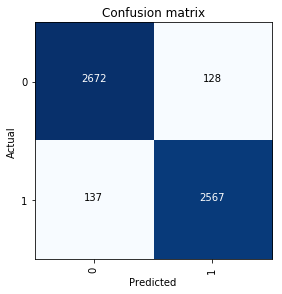

In [58]:
interp.plot_confusion_matrix()

In [59]:
learn.unfreeze()

In [60]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.141186,0.116783,0.039426


In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


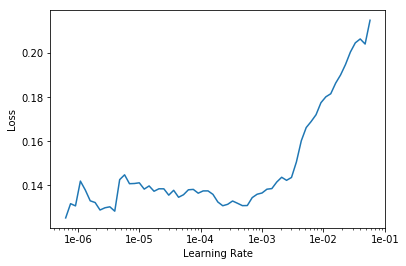

In [62]:
learn.recorder.plot()

In [63]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.118870,0.104693,0.037427
2,0.108816,0.105676,0.039426


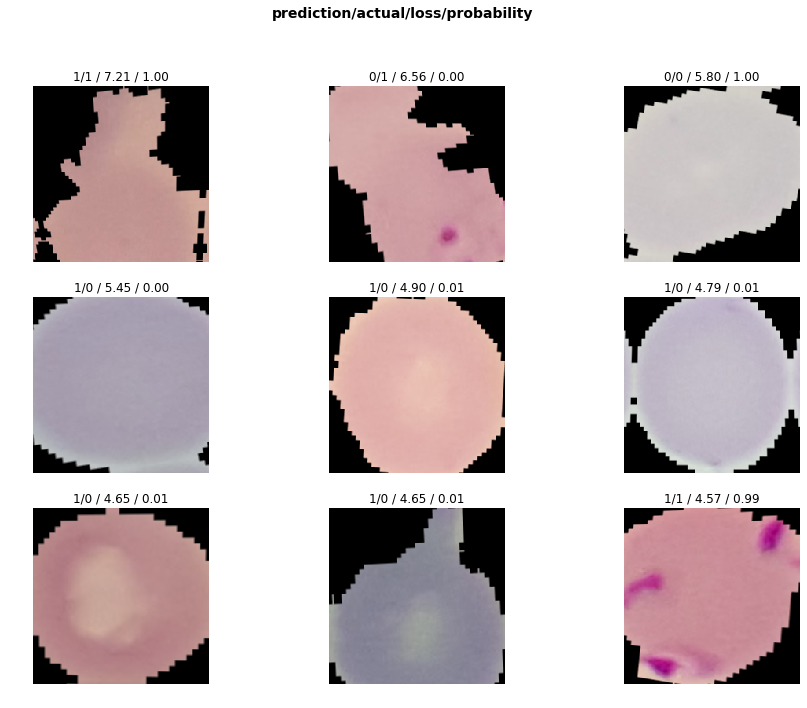

In [57]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
from torch.utils.data.dataset import Dataset
from torchvision import transforms

class MyCustomDataset(Dataset):
    def __init__(self, ..., transforms=None):
        # stuff
        ...
        self.transforms = transforms
        
    def __getitem__(self, index):
        # stuff
        ...
        data = # Some data read from a file or image
        if self.transforms is not None:
            data = self.transforms(data)
        # If the transform variable is not empty
        # then it applies the operations in the transforms with the order that it is created.
        return (img, label)

    def __len__(self):
        return count # of how many data(images?) you have
    
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
])
dataset = ImdbWikiDataset(transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=1)

In [43]:
data.valid_ds

LabelList
y: CategoryList (5512 items)
[Category 0, Category 1, Category 1, Category 0, Category 1]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test
x: ImageItemList (5512 items)
[Image (3, 103, 145), Image (3, 151, 136), Image (3, 127, 118), Image (3, 148, 127), Image (3, 118, 103)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test

In [28]:
?DataLoader

In [24]:
data.valid_ds

LabelList
y: CategoryList (3306 items)
[Category 0, Category 0, Category 0, Category 1, Category 0]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train
x: ImageItemList (3306 items)
[Image (3, 154, 124), Image (3, 124, 109), Image (3, 127, 112), Image (3, 148, 148), Image (3, 109, 106)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train

In [20]:
?ImageDataBunch.from_df